In [76]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [77]:
vgames_data=pd.read_csv('vgsales.csv')
vgames_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [78]:
df=vgames_data.copy()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [79]:
vgames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [80]:
vgames_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [81]:
#dropping the null values
vgames_data.dropna( axis=0, how="any", thresh=None, subset=['Year','Publisher'], inplace=True)

In [82]:
vgames_data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [83]:
vgames_data.shape

(16291, 11)

In [84]:
vgames_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [85]:
# We use only global sales
vgames_data.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1,inplace=True)
vgames_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


# QUESTION 1

Text(0.5, 1.0, 'Sales of different genre Globally')

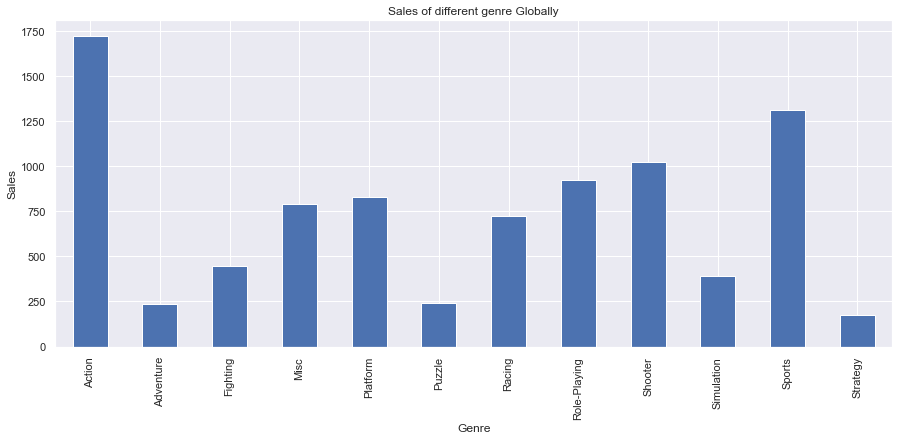

In [86]:
ax=plt.figure(figsize=(15,6))
vgames_data.groupby(['Genre'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales of different genre Globally')

In [87]:
#action genre has best sales
vgames_data.groupby('Genre').max()

,Rank,Name,Platform,Year,Publisher,Global_Sales
Genre,,,,,,
Action,16592,inFAMOUS: Second Son,XOne,2017.0,"mixi, Inc",21.40
Adventure,16594,iCarly 2: iJoin The Click!,XOne,2016.0,imageepoch Inc.,11.18
Fighting,16566,Zero Divide,XOne,2016.0,Zoo Digital Publishing,13.04
Misc,16545,uDraw Studio: Instant Artist,XOne,2016.0,Zushi Games,29.02
Platform,16600,¡Shin Chan Flipa en colores!,XOne,2016.0,Zoo Digital Publishing,40.24
Puzzle,16599,th!nk Logic Trainer,XB,2015.0,iWin,30.26
Racing,16598,nail'd,XOne,2016.0,bitComposer Games,35.82
Role-Playing,16593,Zwei!!,XOne,2017.0,inXile Entertainment,31.37
Shooter,16597,Zone of the Enders,XOne,2016.0,id Software,28.31


# Visualizations

In [88]:
vgames_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [89]:
sns.set()

# QUESTION 2 

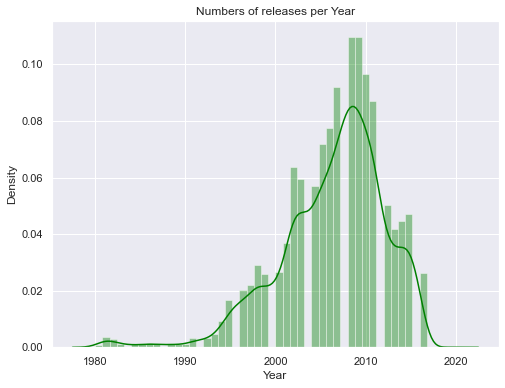

In [90]:
plt.figure(figsize=(8,6))
plt.title("Numbers of releases per Year")
sns.distplot(vgames_data['Year'],color='green');

2009 has the highest numberof game releases

Data Analysis

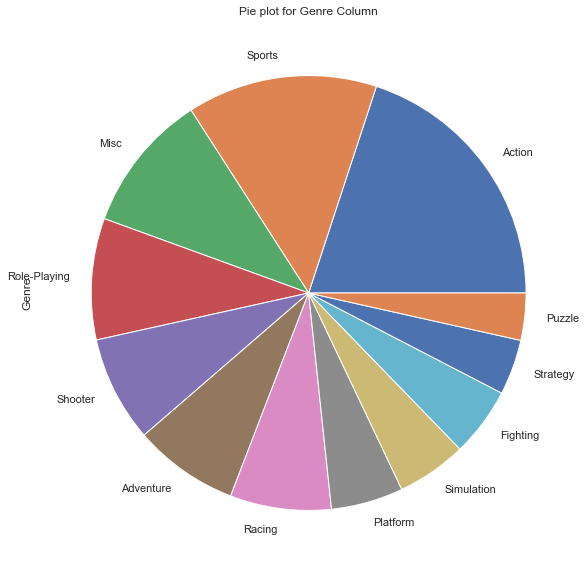

In [91]:
plt.figure(figsize=(20,10))
plt.title("Pie plot for Genre Column")
vgames_data.Genre.value_counts().plot(kind="pie");

Action and Sports are the best selling genres.

# QUESTION 3

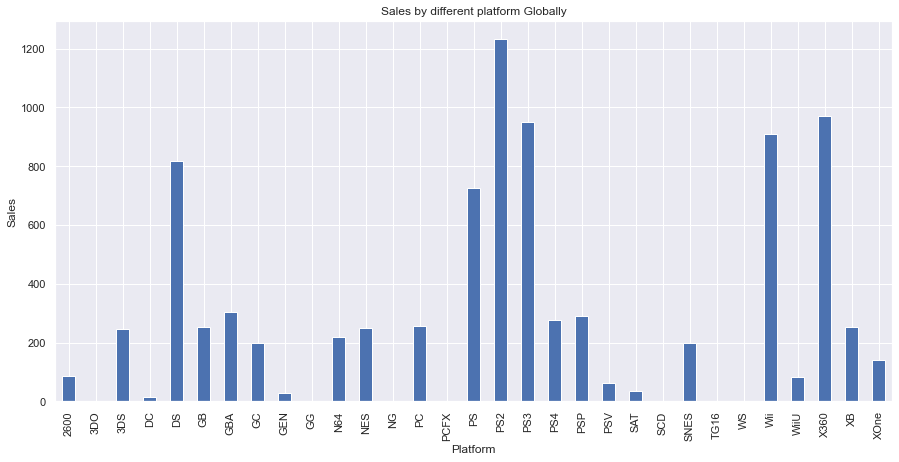

In [92]:
ax=plt.figure(figsize=(15,7))
vgames_data.groupby(['Platform'])['Global_Sales'].sum().plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales by different platform Globally');


PS2 has recorded highest sales globally

# QUESTION 4

Text(0.5, 1.0, 'Sales by top 5 publishers Globally')

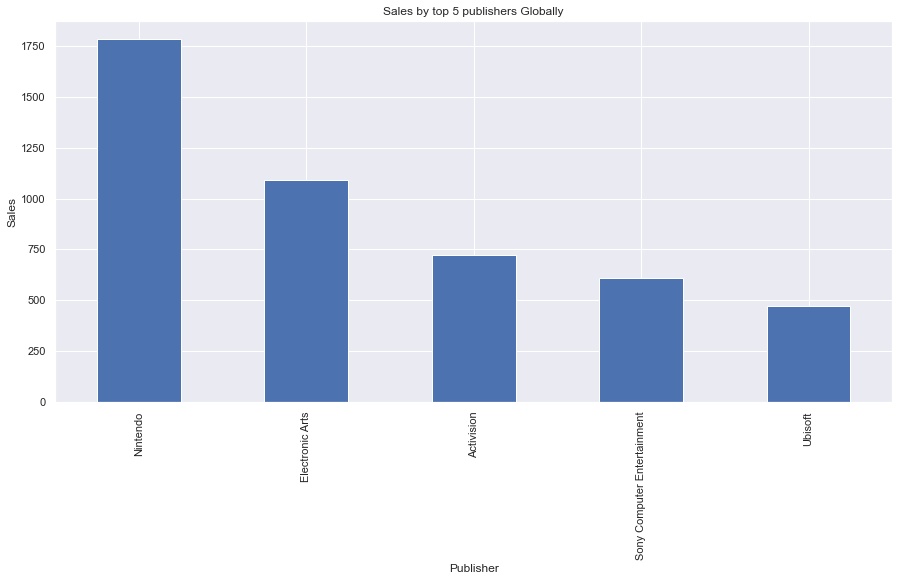

In [93]:
ax=plt.figure(figsize=(15,7))
vgames_data.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sales by top 5 publishers Globally')

Above are the top 5 publishers with highest sales.Nintendo has around 1750 million sales

# QUESTION 5

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Action'),
  Text(0, 1.5, 'Adventure'),
  Text(0, 2.5, 'Fighting'),
  Text(0, 3.5, 'Misc'),
  Text(0, 4.5, 'Platform'),
  Text(0, 5.5, 'Puzzle'),
  Text(0, 6.5, 'Racing'),
  Text(0, 7.5, 'Role-Playing'),
  Text(0, 8.5, 'Shooter'),
  Text(0, 9.5, 'Simulation'),
  Text(0, 10.5, 'Sports'),
  Text(0, 11.5, 'Strategy')])

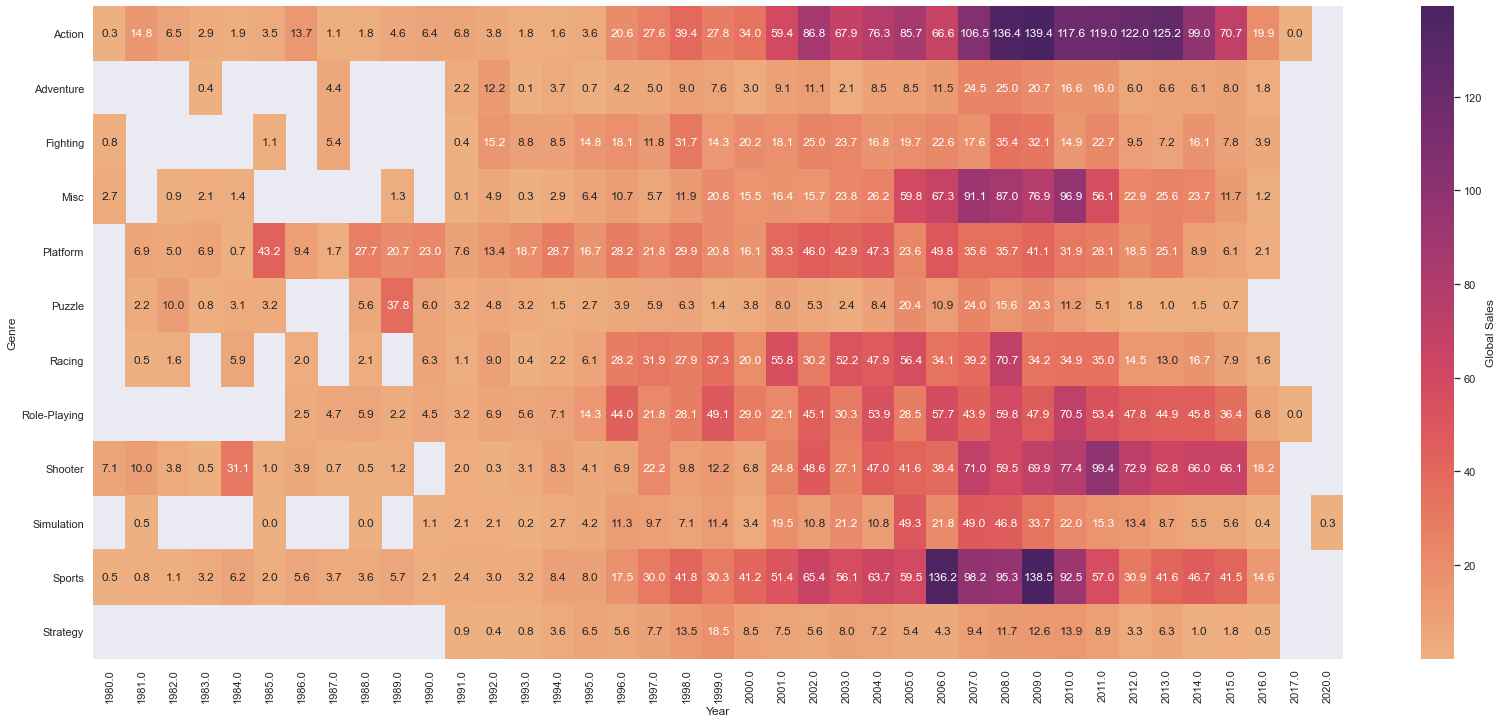

In [94]:
data=vgames_data.groupby ([ 'Year','Genre']) ['Global_Sales'].sum().unstack (['Year'])
# set plot dimensions
plt.figure (figsize =[28, 12])
sns.heatmap (data,annot=True ,fmt='.1f', cmap='flare', cbar_kws={'label': 'Global Sales'});
plt.yticks(rotation=0)

# QUESTION 6

Text(0.5, 1.0, 'Global Sales over the years')

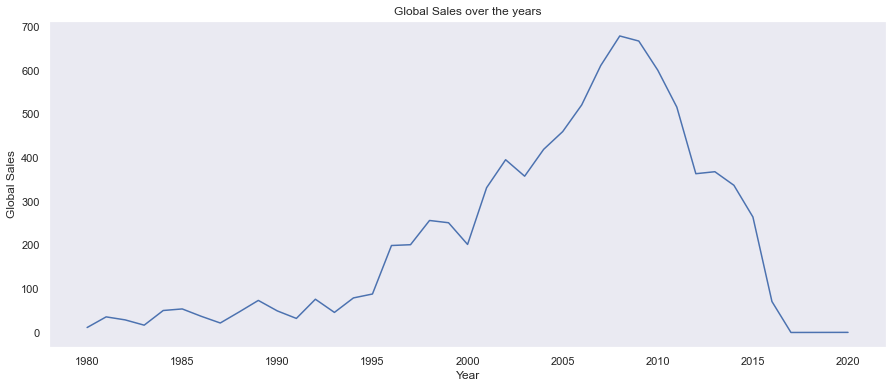

In [95]:
#Global Sales over the years

ax=plt.figure(figsize=(15,6))
df.groupby(['Year'])['Global_Sales'].sum().plot()
plt.grid()
plt.ylabel('Global Sales')
plt.title('Global Sales over the years')



**Highest sales have been recorded from 2007 to 2010**

# QUESTION 7 - North America

Text(0.5, 1.0, 'Sales of different genre in North America')

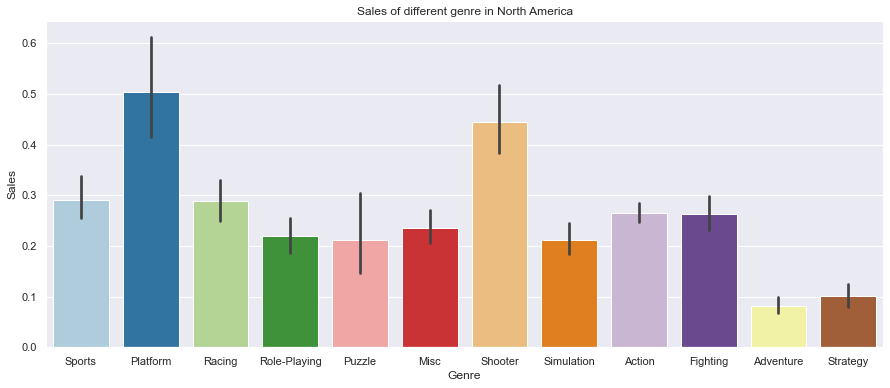

In [96]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='NA_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in North America')

#  QUESTION 7 - Europe

Text(0.5, 1.0, 'Sales of different platform in Europe')

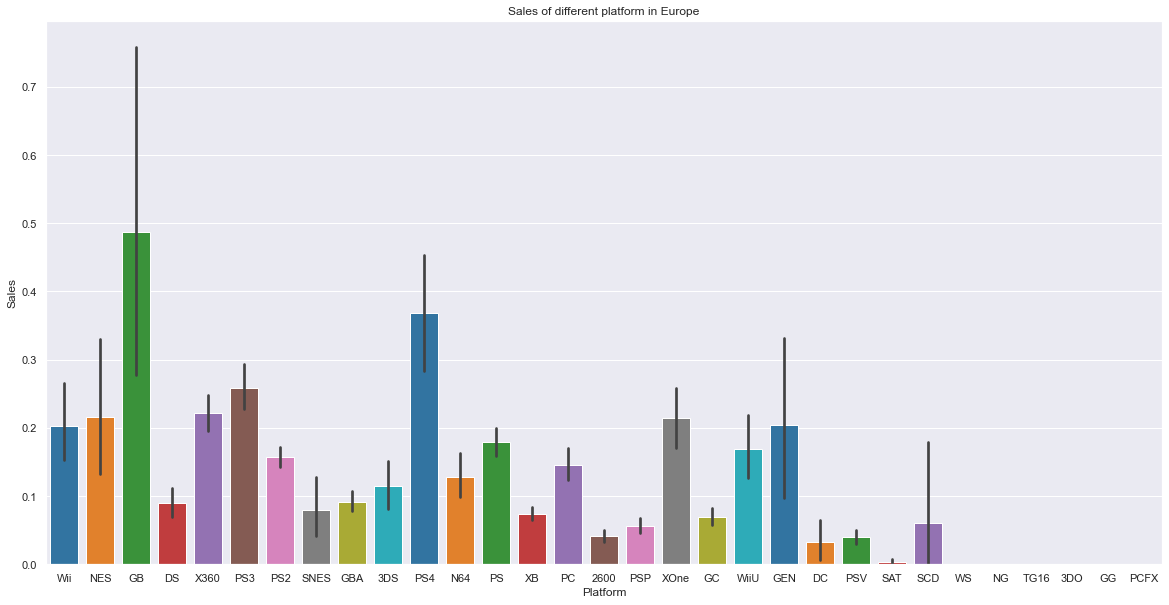

In [97]:
ax=plt.figure(figsize=(20,10))
sns.barplot(x='Platform',y='EU_Sales',data=df,palette='tab10')
plt.ylabel('Sales')
plt.title('Sales of different platform in Europe')

# QUESTION 7 - Japan

Text(0.5, 1.0, 'Sales of different genre in Japan')

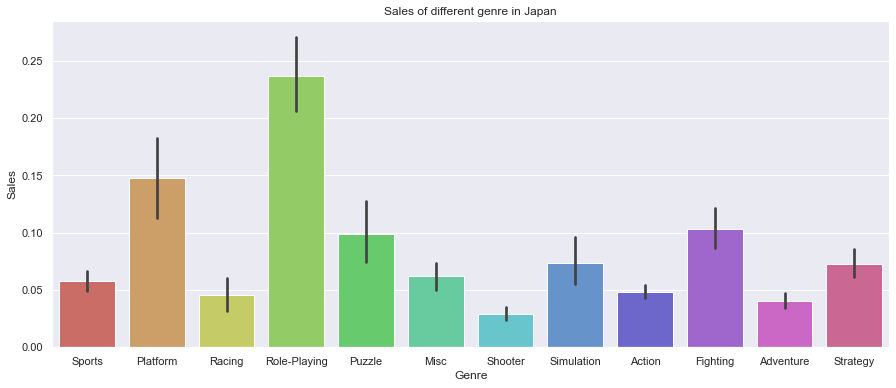

In [98]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='JP_Sales',data=df,palette='hls')
plt.ylabel('Sales')
plt.title('Sales of different genre in Japan')
#Role play games are highly played in Japan

#  QUESTION 7 - Other Regions

Text(0.5, 1.0, 'Sales of different platform in other Regions')

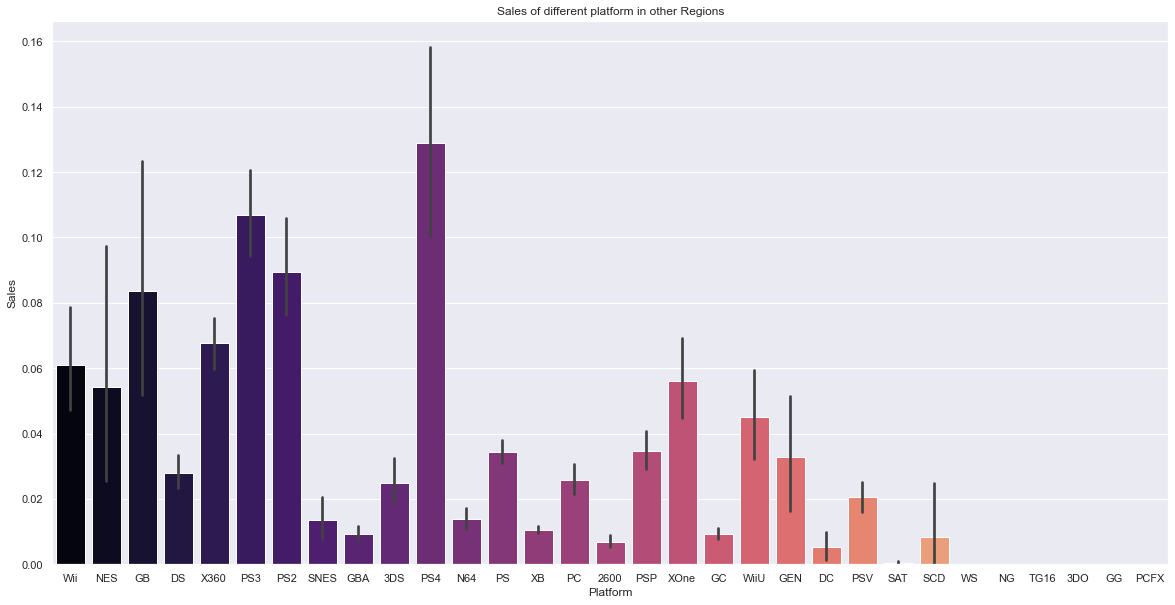

In [99]:

ax=plt.figure(figsize=(20,10))
sns.barplot(x='Platform',y='Other_Sales',data=df,palette='magma')
plt.ylabel('Sales')
plt.title('Sales of different platform in other Regions')

In [100]:
df.shape

(16598, 11)

In [101]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [102]:
#check duplication
len(df)-len(df.drop_duplicates())

0

In [103]:
#Data Preprocessing
# null values are little so i will drop them
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)

In [104]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Dealing with Outliers

<AxesSubplot:>

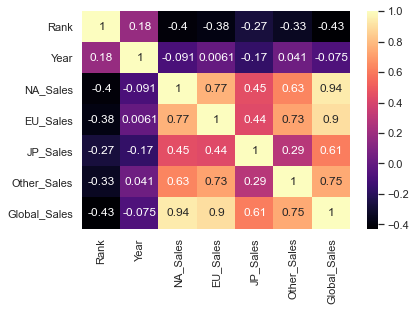

In [105]:
dfcopy=df.corr() 
sns.heatmap(dfcopy ,annot = True, cmap="magma")

Rank               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Year            AxesSubplot(0.285345,0.657941;0.133621x0.222059)
NA_Sales         AxesSubplot(0.44569,0.657941;0.133621x0.222059)
EU_Sales        AxesSubplot(0.606034,0.657941;0.133621x0.222059)
JP_Sales        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Other_Sales        AxesSubplot(0.125,0.391471;0.133621x0.222059)
Global_Sales    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

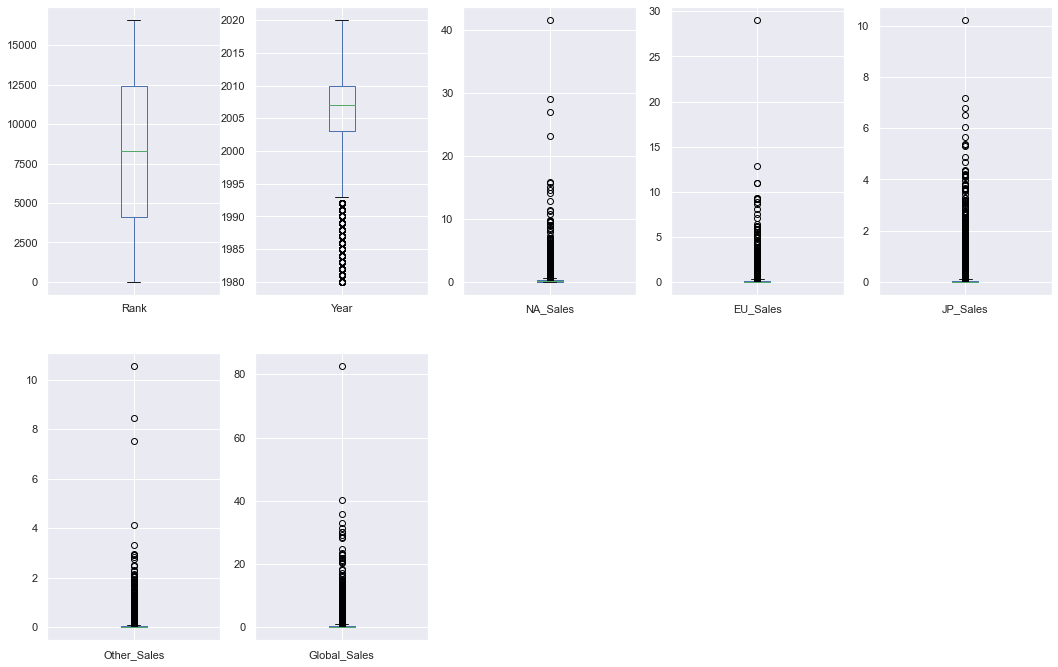

In [106]:
df.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (3,5))

(0.0, 30.47140487188924)

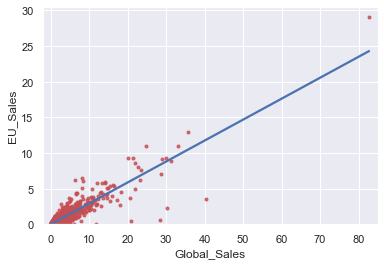

In [107]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

In [108]:
df = df.drop([0],axis=0) 

(0.0, 13.52411103334368)

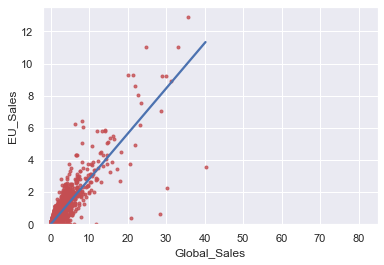

In [109]:
g = sns.regplot(df.Global_Sales,df.EU_Sales,ci=None,scatter_kws= {"color":"r","s":9});
plt.xlim(-2,85)
plt.ylim(bottom=0)

# Label Encoding

In [110]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [111]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()

le = LabelEncoder()

feature = ["Platform", "Genre"]


for col in feature:
    df2[col] = le.fit_transform(df[col])
    

In [112]:
df2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,11,1985,4,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008,6,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009,10,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996,7,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,5,1989,5,Nintendo,23.20,2.26,4.22,0.58,30.26


In [113]:
X = df2[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values

y = df2['Global_Sales'].values

**Train - Test**

In [114]:
X.shape

(16290, 6)

In [115]:
y.shape

(16290,)

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [117]:
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()

In [118]:
x_train = ro.fit_transform(x_train)
x_test = ro.fit_transform(x_test)

**Modeling**

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

In [120]:
# Machine Learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


#Machine Learning models
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

  
  # REGRESSION

**Linear Regression**

In [121]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [122]:
lr.score(x_train,y_train)

0.9999861192562169

In [123]:
lr.score(x_test,y_test)

0.9999879850329042

In [124]:
yLinearPre = lr.predict(x_test)

In [125]:
r2Linear = r2_score(y_test , yLinearPre)
r2Linear

0.9999879850329042

<Figure size 1152x576 with 0 Axes>

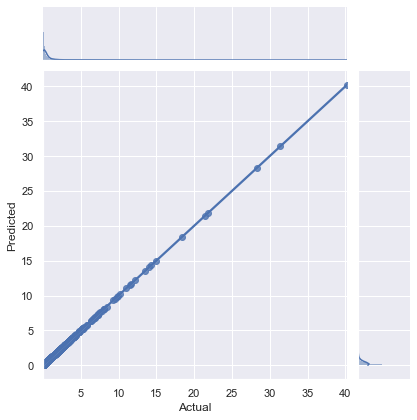

In [126]:
test = pd.DataFrame({'Predicted':yLinearPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [127]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yLinearPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.0029547715225956284


In [128]:
dbLinear = pd.DataFrame({'Actual': y_test, 'Predicted': yLinearPre})
dbLinear

,Actual,Predicted
0,0.57,0.570270
1,0.02,0.020324
2,0.33,0.320229
3,0.67,0.670215
4,0.15,0.150223
...,...,...
4068,0.05,0.040197
4069,0.23,0.240351
4070,2.20,2.200280
4071,0.19,0.190427


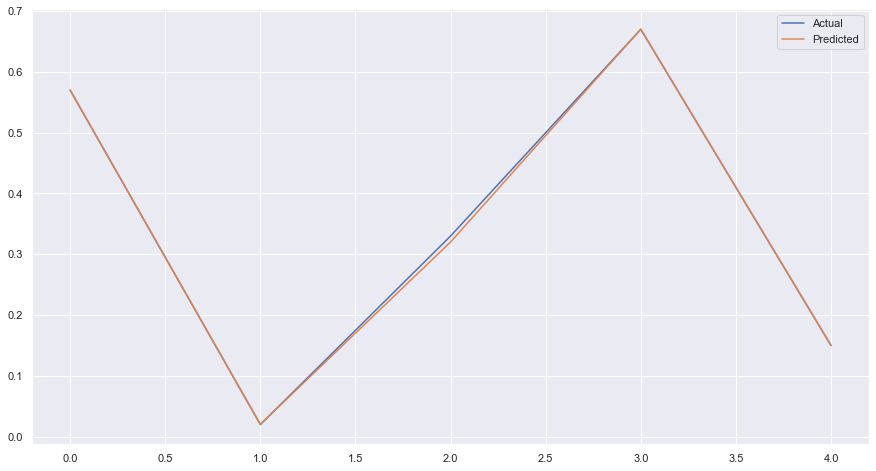

In [129]:
dbLinear1 = dbLinear.head()
dbLinear1.plot(kind='line',figsize=(15,8))
plt.show()

In [130]:
lr.coef_

array([-1.09384339e-04, -4.72731391e-05,  2.39996484e-01,  1.10007377e-01,
        3.99904466e-02,  3.99673977e-02])

**RandomForestRegressor**

In [131]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [132]:
rf.score(x_train,y_train)

0.9971490973071744

In [133]:
rf.score(x_test,y_test)

0.9654507689107092

In [134]:
yRandomPre= rf.predict(x_test)

In [135]:
r2Random = r2_score(y_test , yRandomPre)
r2Random

0.9654507689107092

In [136]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yRandomPre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.03040283699773622


In [137]:
dbRandom = pd.DataFrame({'Actual': y_test, 'Predicted': yRandomPre})
dbRandom

,Actual,Predicted
0,0.57,0.568167
1,0.02,0.020000
2,0.33,0.320700
3,0.67,0.646300
4,0.15,0.154659
...,...,...
4068,0.05,0.043861
4069,0.23,0.239300
4070,2.20,2.225100
4071,0.19,0.190000


<Figure size 1152x576 with 0 Axes>

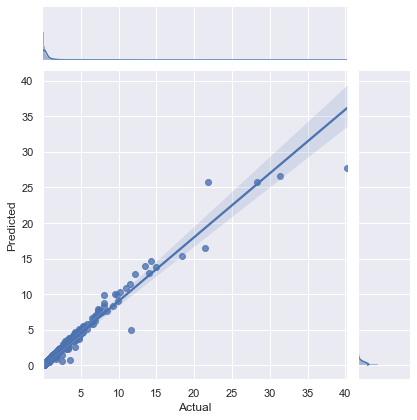

In [138]:
test = pd.DataFrame({'Predicted':yRandomPre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

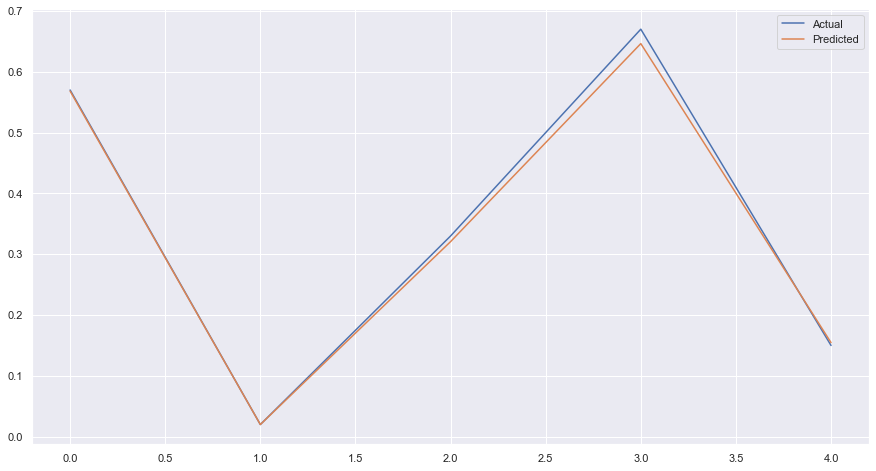

In [139]:
dbRandom1 = dbRandom.head()
dbRandom1.plot(kind='line',figsize=(15,8))
plt.show()

In [140]:
rf.feature_importances_

array([0.00132284, 0.00131682, 0.81327136, 0.14178784, 0.03417872,
       0.00812242])

**Decsion Tree**

In [141]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [142]:
regressor.score(x_train,y_train)

0.9999977849831169

In [143]:
regressor.score(x_test,y_test)

0.9583570391015612

In [144]:
yTreePre= regressor.predict(x_test)

In [145]:
r2Tree= r2_score(y_test ,yTreePre )
r2Tree

0.9583570391015612

In [146]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yTreePre, y_test)
print('Mean absolute error '+str(mae))

Mean absolute error 0.04841561888698036


In [147]:
db = pd.DataFrame({'Actual': y_test, 'Predicted': yTreePre})
db

,Actual,Predicted
0,0.57,0.570000
1,0.02,0.020000
2,0.33,0.320000
3,0.67,0.600000
4,0.15,0.155000
...,...,...
4068,0.05,0.045000
4069,0.23,0.240000
4070,2.20,2.270000
4071,0.19,0.190000


<Figure size 1152x576 with 0 Axes>

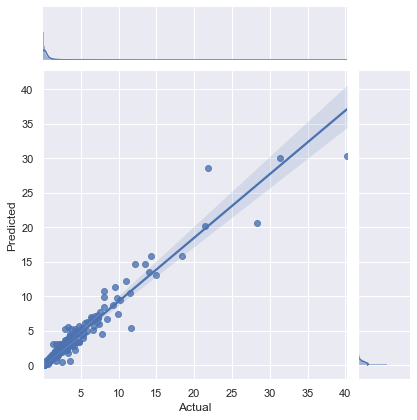

In [148]:
test = pd.DataFrame({'Predicted':yTreePre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

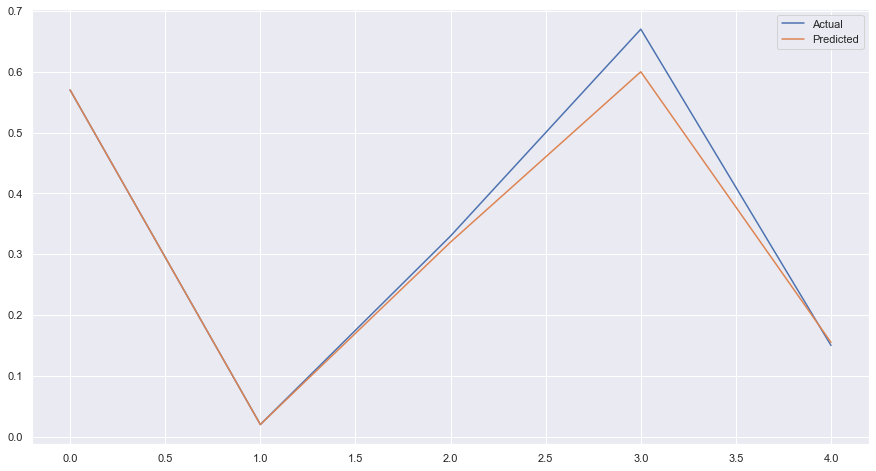

In [149]:
db1 = db.head()
db1.plot(kind='line',figsize=(15,8))
plt.show()


In [150]:
regressor.feature_importances_

array([1.03023655e-03, 4.51089733e-04, 8.46745368e-01, 1.12493417e-01,
       3.11157434e-02, 8.16414457e-03])